In [1]:
import numpy as np
import h5py
import illustris_python as il
import matplotlib.pyplot as plt

In [2]:
basePath = 'TNG100-2/' 
subhalos = il.groupcat.loadSubhalos(basePath, 99)

In [3]:
subhalos['SubhaloBHMass']
subhalos.keys()

dict_keys(['count', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMe

In [4]:
pos = subhalos['SubhaloPos']

vel = subhalos['SubhaloVel']

sfr = subhalos['SubhaloSFR']
stellar_mass=subhalos['SubhaloMass']

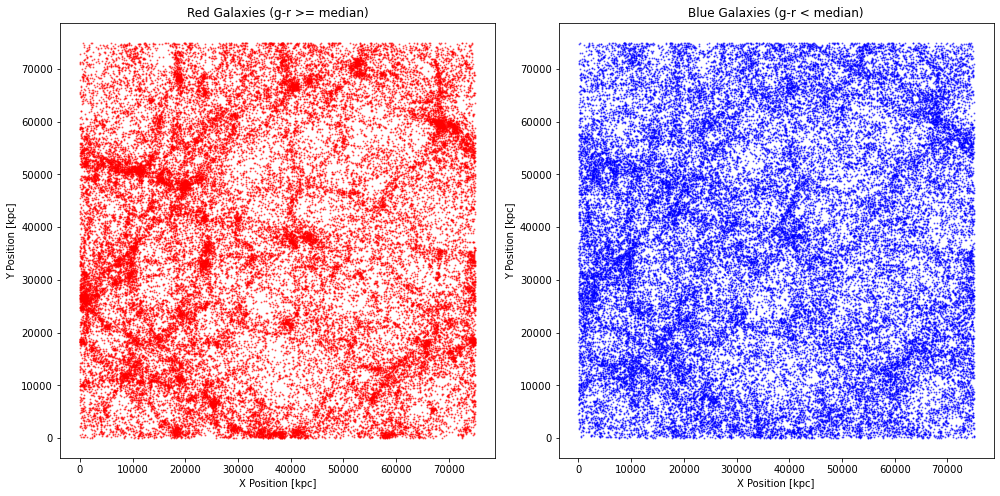

In [5]:
# Filter galaxies with stellar mass above 10^10 M_sun
mass_filter = stellar_mass > 1
filtered_pos = pos[mass_filter]
filtered_g_mag = subhalos['SubhaloStellarPhotometrics'][:,4][mass_filter]
filtered_r_mag = subhalos['SubhaloStellarPhotometrics'][:,5][mass_filter]

# Calculate the g-r color index
color_index = filtered_g_mag - filtered_r_mag

# Split the galaxies into two halves based on the g-r color index
median_color = np.median(color_index)
red_galaxies = filtered_pos[color_index >= median_color]
blue_galaxies = filtered_pos[color_index < median_color]

# Plot the x-y spatial distribution of red and blue galaxies
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].scatter(red_galaxies[:, 0], red_galaxies[:, 1], s=1, c='red', alpha=0.5)
axes[0].set_title('Red Galaxies (g-r >= median)')
axes[0].set_xlabel('X Position [kpc]')
axes[0].set_ylabel('Y Position [kpc]')
axes[0].set_aspect('equal')

axes[1].scatter(blue_galaxies[:, 0], blue_galaxies[:, 1], s=1, c='blue', alpha=0.5)
axes[1].set_title('Blue Galaxies (g-r < median)')
axes[1].set_xlabel('X Position [kpc]')
axes[1].set_ylabel('Y Position [kpc]')
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob

#get particle IDS of different galaxies
fname = 'snapshot_000.hdf5'
f = h5py.File(fname, 'r')
Pos = np.array(f['PartType2/Coordinates'])
IDs = np.array(f['PartType2/ParticleIDs'])
f.close()

right_galaxy_inds = IDs[Pos[:,0] > 0]


for SnapNum in range(len(glob.glob('./output/snapshot*hdf5'))):
    print('Plotting file number {}'.format(SnapNum))

    fname = './output/snapshot_%03d.hdf5' % (SnapNum)
    f = h5py.File(fname, 'r')
    pos = np.array(f['PartType2/Coordinates'])
    IDs = np.array(f['PartType2/ParticleIDs'])
    f.close()

    fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')
    
    
    #distinguish galaxies
    #right galaxy:
    right_inds_bools = np.isin(IDs, right_galaxy_inds)
    right_inds = np.arange(pos.shape[0])[right_inds_bools]
    
    #left galaxy
    left_inds  = np.arange(pos.shape[0])[~right_inds_bools]
    
    ax.plot(pos[right_inds,0], pos[right_inds,1], '.', markersize=1, color='blue')
    ax.plot(pos[left_inds,0], pos[left_inds,1], '.', markersize=1, color='red')
    
    
    ax.set_xlabel('$X$ [ kpc ]')
    ax.set_ylabel('$Y$ [ kpc ]')
    ax.set_xlim([-100, 100])
    ax.set_ylim([-100, 100])

    fout = 'Images_veryslow/pic_%04d.jpg' % (SnapNum)

    #plt.savefig(fout, format='jpg')
    #plt.close()



#plt.show()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'snapshot_000.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)